In [41]:
# Operaciones
import pandas as pd
import numpy as np
import math

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# Leer data
df = pd.read_csv('../data.csv', sep=';')
# Obtener cantidad de filas y cols
print('SHAPE:', df.shape)
# Obtener primeros cinco registros
df.head()

SHAPE: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
# Obtener data types de las cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [35]:
# Obtener datos descriptivos
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## GRAFICOS PARA CONOCIMIENTO DE VARIABLES

### Graficos de categorias bancarias

<AxesSubplot:xlabel='housing', ylabel='count'>

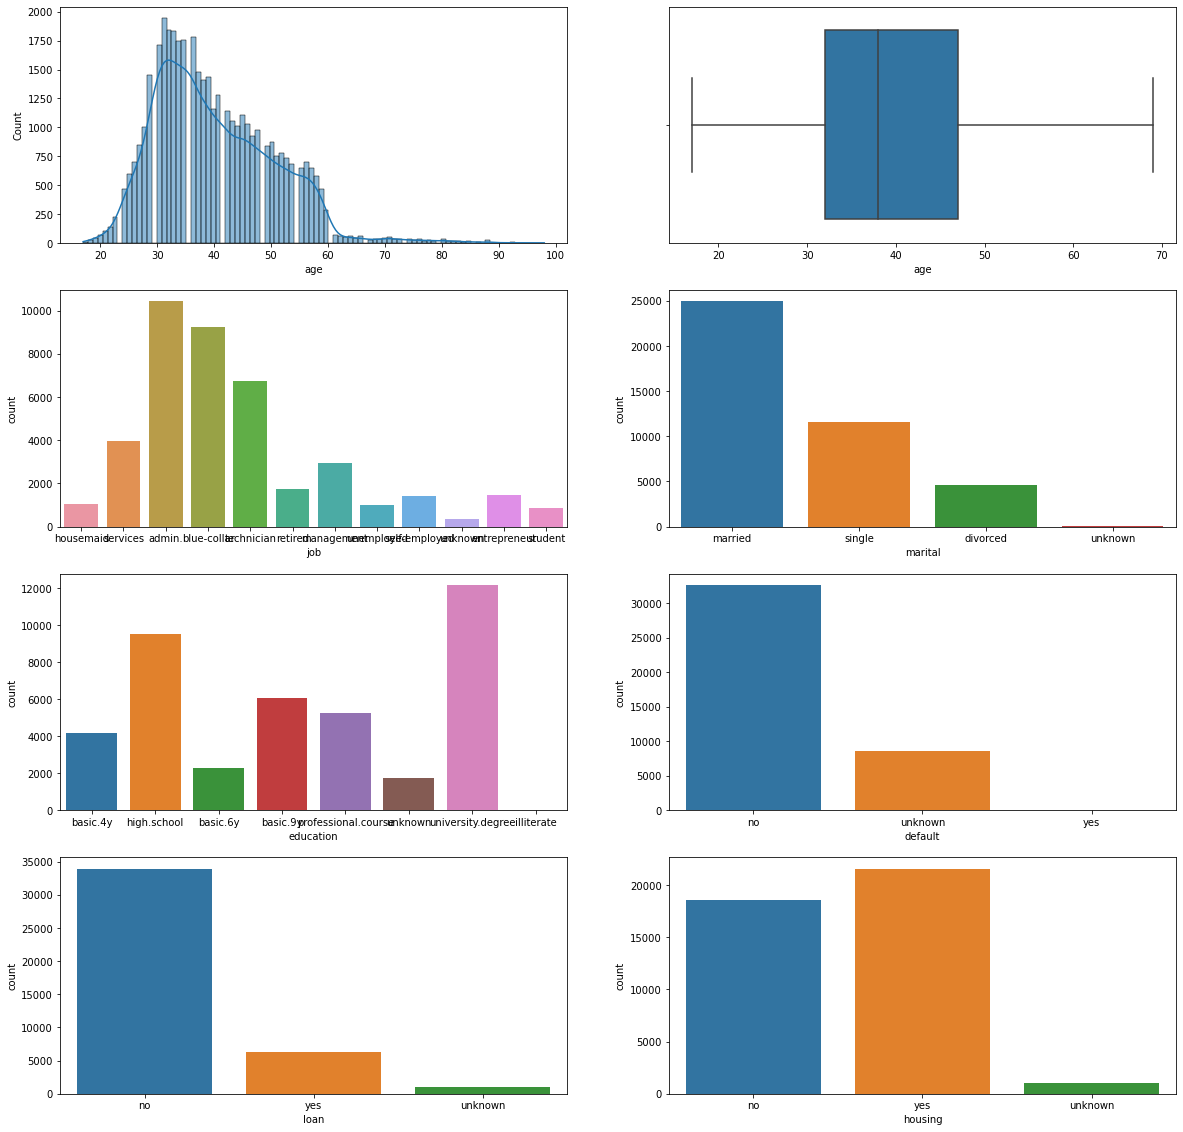

In [90]:
# 4 filas y 2 columnas
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(20,20))

# Age - edad
sns.histplot(data=df, x='age', kde=True, ax=axs[0,0])
sns.boxplot(data=df, x='age', showfliers=False, ax=axs[0,1])

# Job - trabajo
sns.countplot(data=df, x='job', ax=axs[1,0]) # cambiar rotacion de xlabel

# Marital - estado civil
sns.countplot(data=df, x='marital', ax=axs[1,1])

# Education - educacion
sns.countplot(data=df, x='education', ax=axs[2,0])

# Default - Moroso
sns.countplot(data=df, x='default', ax=axs[2,1])

# Loan - Prestamo
sns.countplot(data=df, x='loan', ax=axs[3,0])

# Housing - Hipoteca?
sns.countplot(data=df, x='housing', ax=axs[3,1])

### Graficos de variables de contacto

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

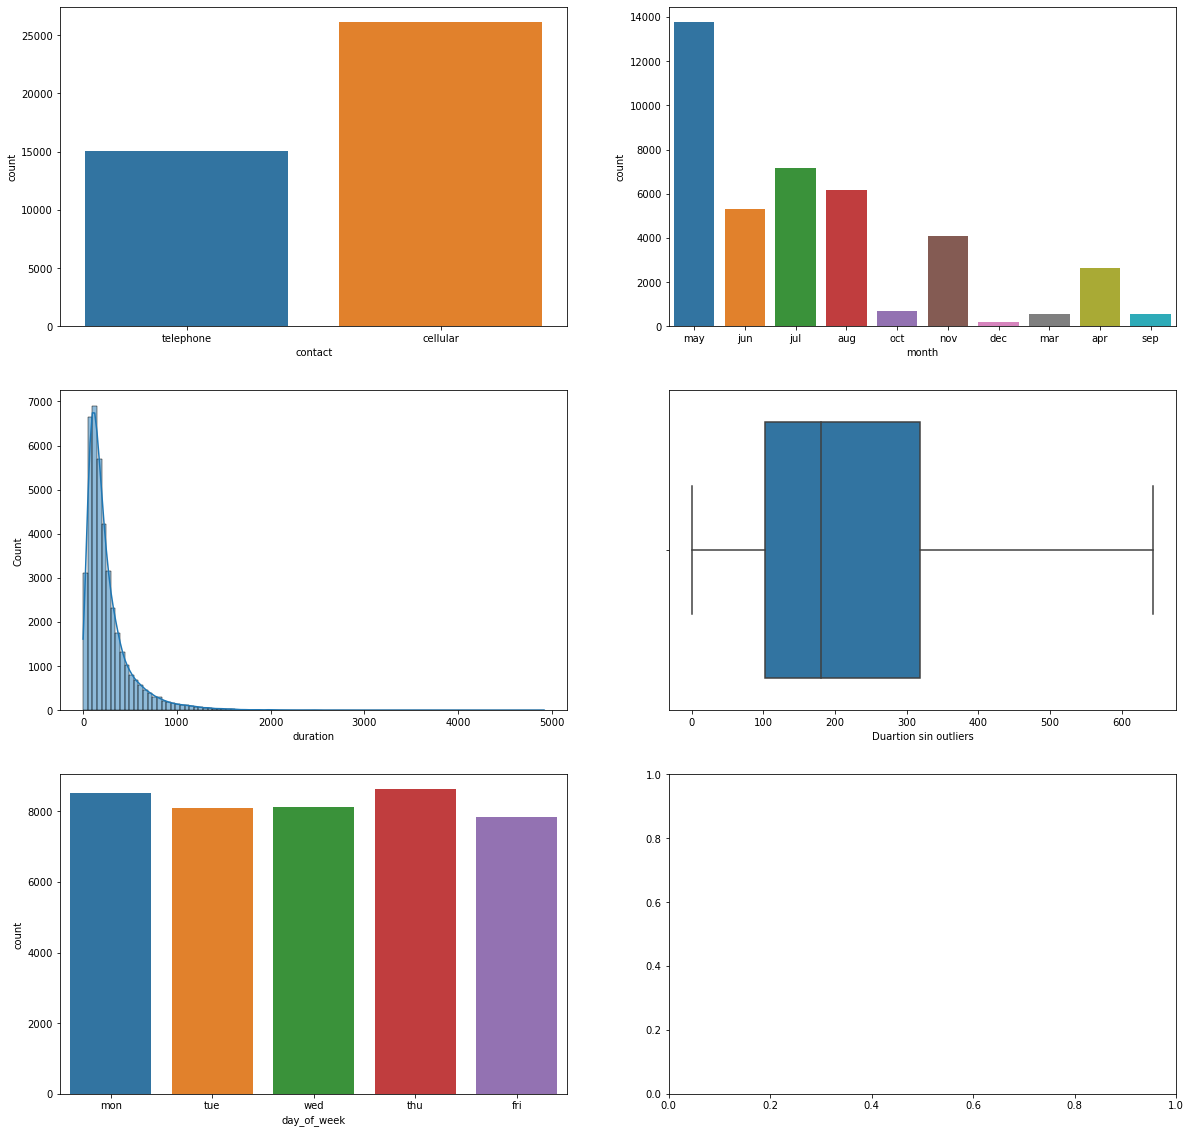

In [91]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(20,20))

# Contact - contacto
sns.countplot(data=df, x='contact', ax=axs[0,0])

# Month - mes
sns.countplot(data=df, x='month', ax=axs[0,1])

# Duration - Duracion
sns.histplot(data=df, x='duration', bins=100, kde=True, ax=axs[1,0])
sns.boxplot(data=df, x='duration', showfliers=False, ax=axs[1,1]).set(xlabel='Duartion sin outliers') # Se grafica sin outliers, ya que, se pueden ver en el histograma

# Day of week - Dia de contacto
sns.countplot(data=df, x='day_of_week', ax=axs[2,0])

### Graficos de variables de campaña

<AxesSubplot:xlabel='previous', ylabel='count'>

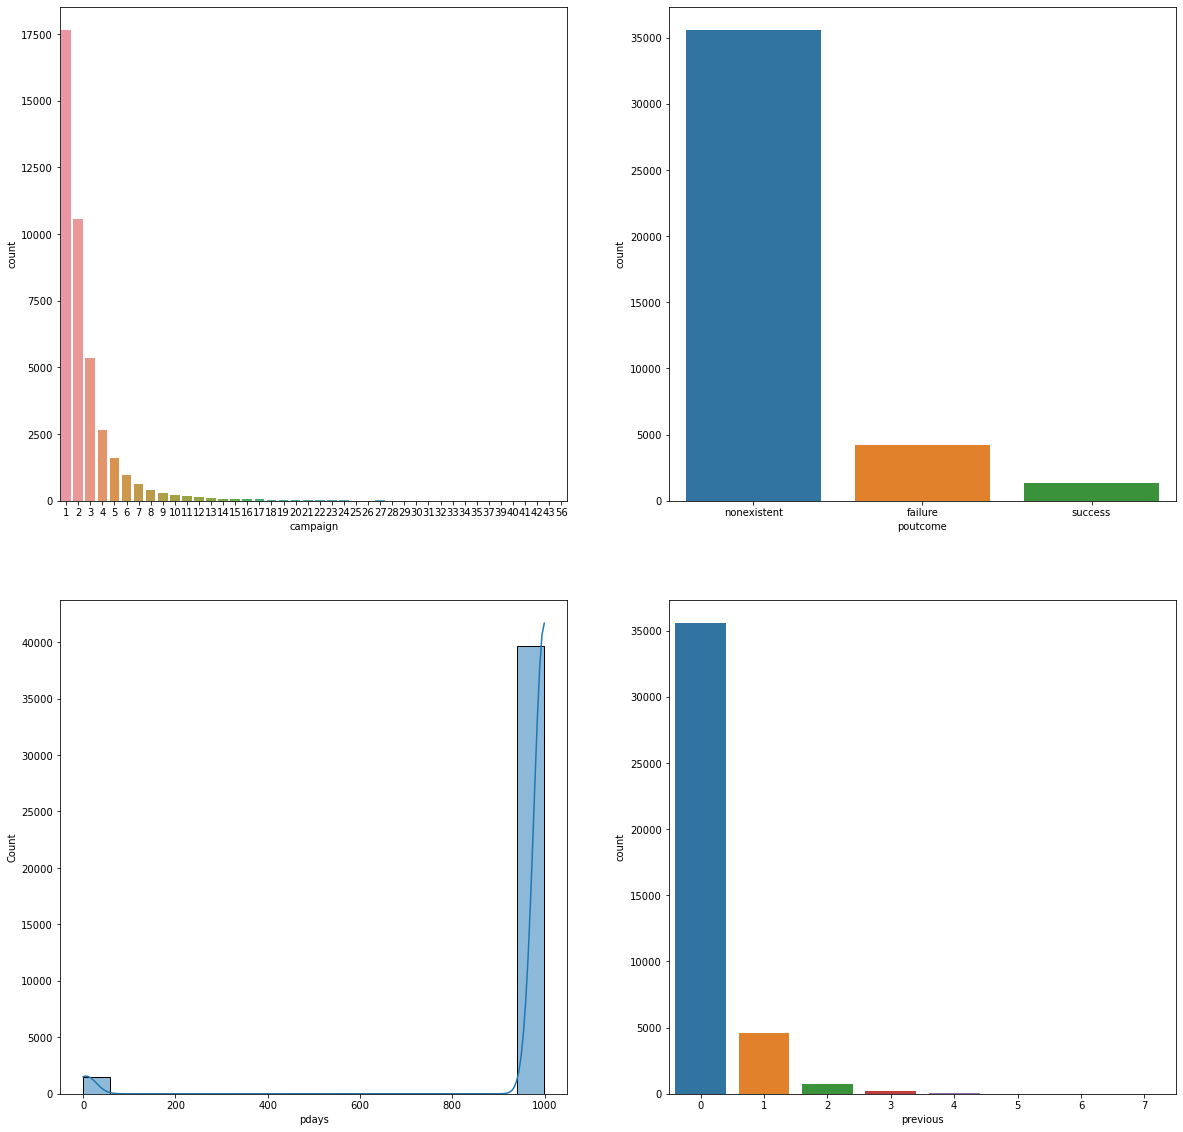

In [110]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20,20))

# Campaign - Campaña
sns.countplot(data=df, x='campaign', ax=axs[0,0])

# Poutcome - Exito previo?
sns.countplot(data=df, x='poutcome',ax=axs[0,1])

# Pdays - Dias
sns.histplot(data=df, x='pdays', kde=True, ax=axs[1,0])

# Previous - Previo
sns.countplot(data=df, x='previous',ax=axs[1,1])

In [72]:
# Cantidad de valores nulos por columna
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Preguntas e hipótesis

1. ¿Es la edad un factor significativo?
2. ¿Influye el nivel de educación?
3. ¿Entre qué variables hay correlación?
4. ¿Cómo se encuentra la situacion crediticia de los clientes?
5. ¿Un aumento de euribor3m, aumenta la probabilidad de adquisición de plazo fijo?
6. ¿Le convenía al usuario adquirir un plazo fijo?

In [55]:
# Transformo la variable target para calcular P-Value
def factorize_y(x):
    if x == 'no':
        return 0
    else:
        return 1
    
df['y'] = df.apply(lambda x: factorize_y(x['y']), axis=1)

### 1. ¿Es la edad un factor significativo? 
H0 = La edad no es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.\
H1 = La edad si es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.

Se va a utilizar P-Value para determinar si la edad es un valor significativo. Si P-Value <= .05, se rechaza la hipotesis nula.
Y si P-Valu > .05, no se rechaza la hipotesis nula. En el caso que P-Value < .05, NO significa que la hipotesis alternativa sea
95% probable.

In [46]:
from scipy import stats

r, p = stats.pearsonr(df.age, df.y)
print('Coeficiente de pearson: ', r)
print('P-Value: ', format(p, '.11f'))

Coeficiente de pearson:  0.030398803040003714
P-Value:  0.00000000068


In [33]:
sample = df.sample(10000).copy()

In [37]:
print('La media de edad de la muestra es', sample.age.mean())
print('La desviacion estandar de edad de la poblacion es', df.age.std())
ci = round(1.96 * (df.age.std()/np.sqrt(10000)), 3)
print(f'El intervalo de confiaza es {sample.age.mean()} +/-{ci}')

La media de edad de la muestra es 39.9074
La desviacion estandar de edad de la poblacion es 10.421249980934048
El intervalo de confiaza es 39.9074 +/-0.204


In [85]:
edad = pd.DataFrame({'si': df.loc[df.y == 1].groupby('age').y.agg('count'), 'no': df.loc[df.y == 0].groupby('age').y.agg('count'),'total':df.groupby('age').y.agg('count')})
edad.fillna(0)
edad.reset_index(level=0, inplace=True)
def get_probs(x):
    return x['si'] / x['total']
edad['probabilidad_si'] = edad.apply(lambda x: get_probs(x), axis=1)
edad['probabilidad_no'] = 1 - edad['probabilidad_si']
edad.fillna(0)

,age,si,no,total,probabilidad_si,probabilidad_no
0,17,2.0,3.0,5,0.400000,0.600000
1,18,12.0,16.0,28,0.428571,0.571429
2,19,20.0,22.0,42,0.476190,0.523810
3,20,23.0,42.0,65,0.353846,0.646154
4,21,29.0,73.0,102,0.284314,0.715686
...,...,...,...,...,...,...
73,91,0.0,2.0,2,0.000000,0.000000
74,92,3.0,1.0,4,0.750000,0.250000
75,94,0.0,1.0,1,0.000000,0.000000
76,95,0.0,1.0,1,0.000000,0.000000


<AxesSubplot:xlabel='age', ylabel='probabilidad_no'>

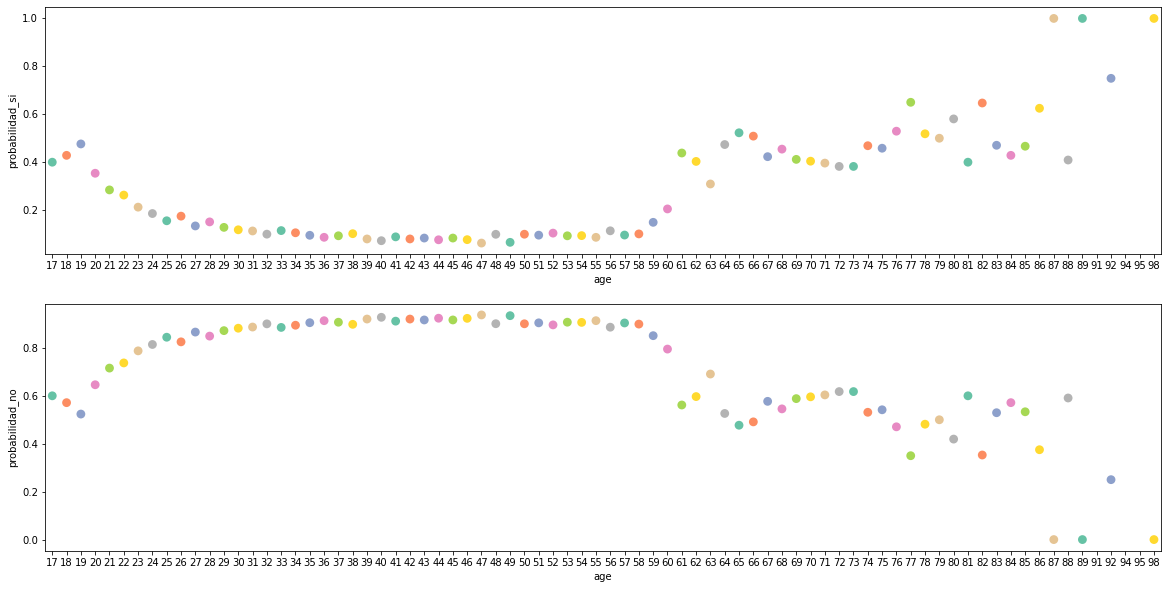

In [90]:
fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
sns.pointplot(x='age', y='probabilidad_si', data=edad, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='age', y='probabilidad_no', data=edad, join=False, palette='Set2', ax=axs[1])

**Respuesta**\
P-Value < .001. Por lo que, se rechaza la hipotesis nula (H0). Además, se puede decir que estamos 95% seguros de que la media de edad es 39.9074 +/-0.204. \
Cuando la edad > 58 años, la probabilidad de adquirir un plazo fijo aumenta de manera considerable.

### 2. ¿Influye el nivel de educación?
Hipotesis a responder: \
H0: El nivel educativo no afecta la adquisición de plazo fijos.\
H1: El nivel educativo si afecta la adquisicion de plazo fijos.

In [56]:
df.education.replace({'unknown': 'desconocido',
            'illiterate': 'ninguno',
            'basic.4y': 'primario',
           'basic.6y':'primario',
           'basic.9y': 'primario',
           'high.school':'secundario',
           'professional.course':'terciario',
           'university.degree':'universitario'}, inplace=True)
df.education.value_counts()

primario         12513
universitario    12168
secundario        9515
terciario         5243
desconocido       1731
ninguno             18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

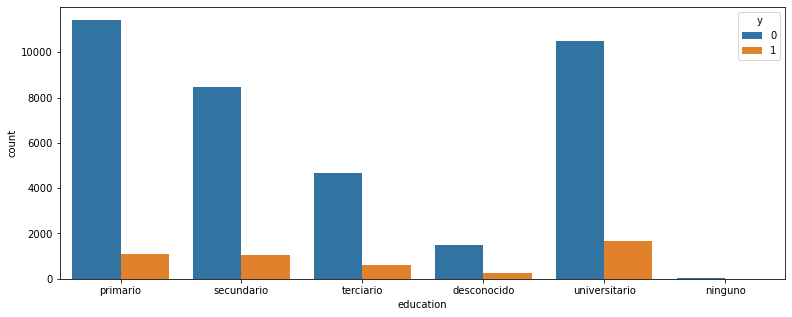

In [71]:
fig, axs = plt.subplots(figsize=(13,5))
sns.countplot(data=df, x='education', hue='y')

In [72]:
education = pd.DataFrame({'si': df.loc[df.y == 1].groupby('education').y.agg('count'), 'no': df.loc[df.y == 0].groupby('education').y.agg('count'),'total':df.groupby('education').y.agg('count')})
def get_probs(x):
    return x['si'] / x['total']
education.reset_index(level=0, inplace=True)
education['probabilidad_si'] = education.apply(lambda x: get_probs(x), axis=1)
education['probabilidad_no'] = 1 - education['probabilidad_si']
education

,education,si,no,total,probabilidad_si,probabilidad_no
0,desconocido,251,1480,1731,0.145003,0.854997
1,ninguno,4,14,18,0.222222,0.777778
2,primario,1089,11424,12513,0.087029,0.912971
3,secundario,1031,8484,9515,0.108355,0.891645
4,terciario,595,4648,5243,0.113485,0.886515
5,universitario,1670,10498,12168,0.137245,0.862755


<AxesSubplot:xlabel='education', ylabel='probabilidad_no'>

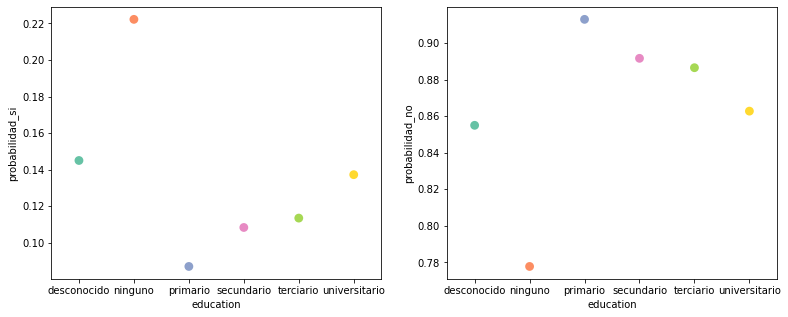

In [82]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(13,5))
sns.pointplot(x='education', y='probabilidad_si', data=education, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='education', y='probabilidad_no', data=education, join=False, palette='Set2', ax=axs[1])

**Respuesta** \
Como se puede apreciar, el nivel de educacion de los usuarios si influye en la adquisición de plazos fijos. A medida que aumenta el nivel educativo, aumentan las probabilidades de adquirir un plazo fijo

### 3. ¿Entre qué variables hay correlación?
**TODO**

### 4. ¿Cómo se encuentra la situacion crediticia de los clientes?
En esta pregunta, se intentara encontrar la relación entre las 3 variables bancarias (loan - housing - default). Es interesante, ya que, se va a poder apreciar si la persona es responsable cuando adquiere obligaciones financieras.

In [95]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [97]:
def productos_financieros(x):
    if x.loan == 'yes' or x.housing == 'yes':
        return 'yes'
    elif x.loan == 'unknown' or x.housing == 'unknown':
        return 'unknown'
    else:
        return 'no'
df['productos_financieros'] = df.apply(lambda x: productos_financieros(x), axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,productos_financieros
0,56,housemaid,married,primario,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
1,57,services,married,secundario,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
2,37,services,married,secundario,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,yes
3,40,admin.,married,primario,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
4,56,services,married,secundario,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,terciario,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,yes
41184,46,blue-collar,married,terciario,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,no
41185,56,retired,married,universitario,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,yes
41186,44,technician,married,terciario,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,no


[Text(0.5, 0, 'morosos')]

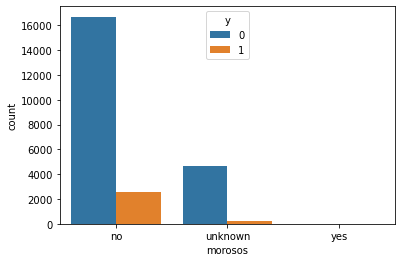

In [111]:
# Grafico que muestra la cantidad de gente que tiene productos financieros
sns.countplot(data=df.loc[df.productos_financieros == 'yes'], x='default', hue='y').set(xlabel='morosos')

**Respuesta**\
Se puede observar que la gente mayoria de la gente que contrajo obligaciones financieras, no poseen moras.

### 5. ¿Un aumento de euribor3m, aumenta la probabilidad de adquisición de plazo fijo?

<AxesSubplot:xlabel='euribor3m'>

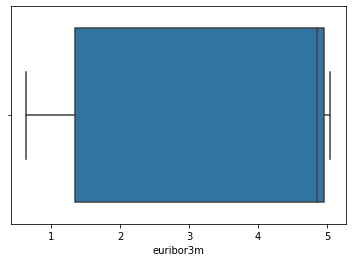

In [120]:
sns.boxplot(data=df, x='euribor3m')

In [147]:
df['euribor3m'] = df['euribor3m'].astype('float64')

In [155]:
def group_euribor3m(x):
    try:
        if x.euribor3m >= 0 and x.euribor3m < 1:
            return '[0-1]'
        elif x.euribor3m >= 1 and x.euribor3m < 2:
            return '[1-2]'
        elif x.euribor3m >= 2 and x.euribor3m < 3:
            return '[2-3]'
        elif x.euribor3m >= 3 and x.euribor3m < 4:
            return '[3-4]'
        elif x.euribor3m >= 4 and x.euribor3m < 5:
            return '[4-5]'
        elif x.euribor3m >= 5 and x.euribor3m < 6:
            return '[5-6]'
    except:
        print('error',x.euribor3m)
    
df['euribor3m_group'] = df.apply(lambda x: group_euribor3m(x), axis=1)

In [158]:
euribor3m = pd.DataFrame({'si': df.loc[df.y == 1].groupby('euribor3m_group').y.agg('count'), 'no': df.loc[df.y == 0].groupby('euribor3m_group').y.agg('count'),'total':df.groupby('euribor3m_group').y.agg('count')})
def get_probs(x):
    return x['si'] / x['total']
euribor3m.reset_index(level=0, inplace=True)
euribor3m['probabilidad_si'] = euribor3m.apply(lambda x: get_probs(x), axis=1)
euribor3m['probabilidad_no'] = 1 - euribor3m['probabilidad_si']
euribor3m

,euribor3m_group,si,no,total,probabilidad_si,probabilidad_no
0,[0-1],1778,2112,3890,0.457069,0.542931
1,[1-2],1523,8085,9608,0.158514,0.841486
2,[3-4],1,13,14,0.071429,0.928571
3,[4-5],1330,26330,27660,0.048084,0.951916
4,[5-6],8,8,16,0.500000,0.500000


In [160]:
df.euribor3m_group.value_counts()

[4-5]    27660
[1-2]     9608
[0-1]     3890
[5-6]       16
[3-4]       14
Name: euribor3m_group, dtype: int64

<AxesSubplot:xlabel='euribor3m_group', ylabel='probabilidad_no'>

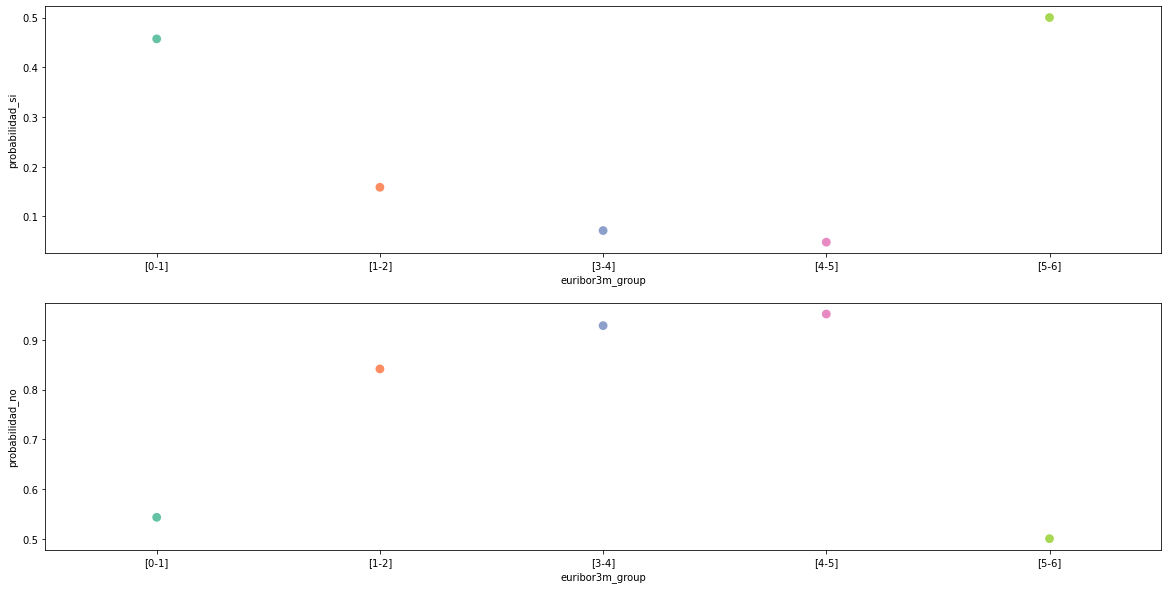

In [159]:
fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
sns.pointplot(x='euribor3m_group', y='probabilidad_si', data=euribor3m, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='euribor3m_group', y='probabilidad_no', data=euribor3m, join=False, palette='Set2', ax=axs[1])

In [161]:
sample = df.loc[df.euribor3m_group == '[3-4]'].sample(n=4).copy()
sample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,productos_financieros,euribor3m_group
27684,48,admin.,married,secundario,no,yes,yes,telephone,dec,fri,...,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,0,yes,[3-4]
27677,32,unemployed,single,secundario,no,no,yes,telephone,nov,thu,...,0,nonexistent,-0.1,93.200,-42.0,3.879,5195.8,0,yes,[3-4]
27687,36,blue-collar,married,secundario,no,yes,no,cellular,dec,thu,...,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,0,yes,[3-4]
27680,31,admin.,single,secundario,no,yes,no,telephone,dec,mon,...,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,0,yes,[3-4]


In [167]:
print('La media de edad de la muestra es', sample.euribor3m.mean())
print('La desviacion estandar de edad de la poblacion es', df.euribor3m.std())
ci = round(1.96 * (df.euribor3m.std()/np.sqrt(4)), 3)
print(f'El intervalo de confiaza es {sample.euribor3m.mean()} +/-{ci}')

La media de edad de la muestra es 3.64675
La desviacion estandar de edad de la poblacion es 1.734447404851267
El intervalo de confiaza es 3.64675 +/-1.7


**Respuesta**\
Se puede observar que con el aumento de la tasa de interes en los bancos, no aumenta la probabilidad de adquirir un plazo fijo. El unico problema es que los rangos [3-4] y [5-6] poseen menos de 100 registros cada uno, por lo que, la probabilidad no sería muy precisa. Además en los dos rangos, previamente mencionados, la significancia estadística es muy chica, por la cantidad de registros.

### 6. ¿Le convenía al usuario adquirir un plazo fijo?
En esta pregunta, se intentara saber si al usuario le convenía adquirir un plazo fijo o no. Esto resulta interesante, ya que, vamos a poder "pensar" desde el lado del usuario. \
Para saber si le convenia al cliente, vamos a ver si la tasa de interes que le ofrecían al cliente era mayor que la inflación (Indice de Precios del Consumidor, IPC). En caso contrario, no le conviene porque la inflación le licuaria los intereses ganados.

<AxesSubplot:xlabel='month', ylabel='y'>

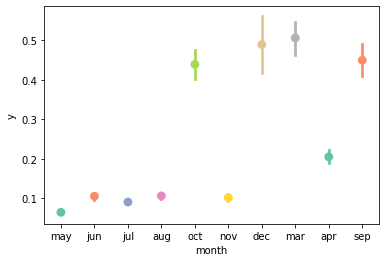

In [178]:
sns.pointplot(x='month', y='y', data=df, join=False, palette='Set2', )